In [174]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg

# 1. Data Loading, Data Understanding (Initial Analysis), Data Cleaning and Preprocessing
## 1.1 Data Loading

In [175]:
health = pd.read_excel('Healthcare_dataset.xlsx', sheet_name=['Feature Description', 'Dataset'])
health_data_about = health['Feature Description']
health_data = health['Dataset']
pd.set_option('display.max_columns', None)


In [176]:
display(health_data_about)

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


In [177]:
health_data.head()
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

## 1.2. Data Understanding (Initial Analysis)
- Looking at Summary Statistics of the Numerical Values
- Looking at Distribution of Numerical Values 
- Looking at the Numerical Outlier Detection
- Looking at the Number of Unique Values in a Categorical Variable
- Looking at the occurrence of N/A or Unknown values

### Numerical Data Understanding

In [178]:
# Numerical Values Statitstics 
print('Shape of data Rows, Columns:', health_data.shape)
health_data.describe()

Shape of data Rows, Columns: (3424, 69)


,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [179]:
health_data.groupby('Persistency_Flag').agg({'Dexa_Freq_During_Rx': ['mean', 'median', 'std'], 'Count_Of_Risks': ['mean', 'median', 'std']})

Dexa_Freq_During_Rx                   Count_Of_Risks         \
                                mean median        std           mean median   
Persistency_Flag                                                               
Non-Persistent              0.896956    0.0   4.695774       1.169555    1.0   
Persistent                  6.525989    4.0  10.937832       1.355314    1.0   

                            
                       std  
Persistency_Flag            
Non-Persistent    1.068555  
Persistent        1.128150

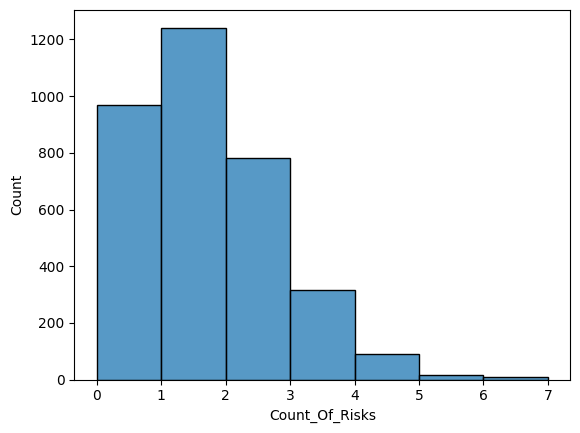

In [180]:
sns.histplot(data=health_data, x='Count_Of_Risks', binwidth=1)
plt.show()

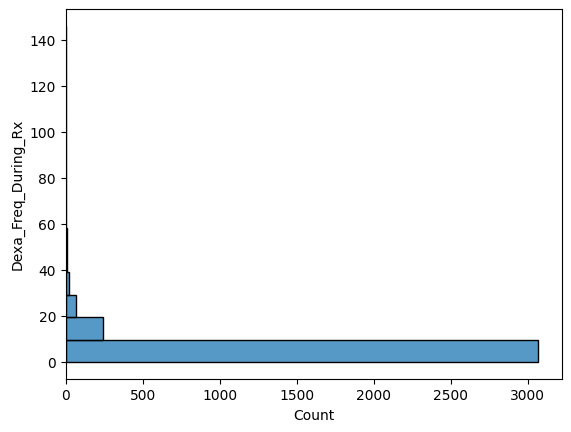

In [181]:
sns.histplot(data=health_data, y='Dexa_Freq_During_Rx', binwidth=10)
plt.show()

<AxesSubplot: xlabel='Count_Of_Risks'>

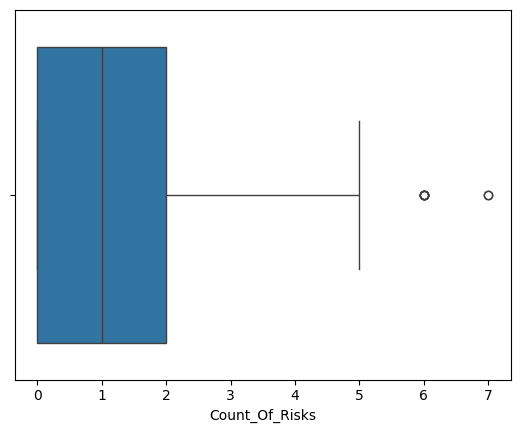

In [182]:
sns.boxplot(data=health_data, x='Count_Of_Risks')

<AxesSubplot: xlabel='Dexa_Freq_During_Rx'>

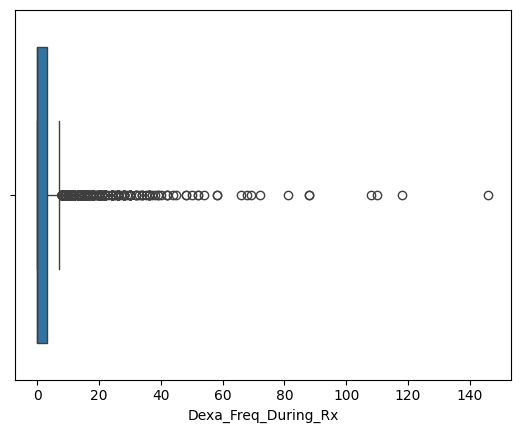

In [183]:
sns.boxplot(data=health_data, x='Dexa_Freq_During_Rx')

Numerical Data Outlier Detection

In [184]:
# Calculation IQR for Dexa_Freq_During_Rx
# 75th Percentile
seventy_fifth_dexa = health_data.Dexa_Freq_During_Rx.quantile(0.75)
# 25th Percentile
twenty_fifth_dexa = health_data.Dexa_Freq_During_Rx.quantile(0.25)
# IQR
iqr_dexa = seventy_fifth_dexa - twenty_fifth_dexa
print('IQR for Dexa_Freq_During_Rx:', iqr_dexa)

#  Calculating the upper and lower limits fo Outlier Detection
upper_dexa = seventy_fifth_dexa + (1.5 * iqr_dexa)
lower_dexa = twenty_fifth_dexa - (1.5 * iqr_dexa)
print('Upper Limit:', upper_dexa, 'Lower Limit:', lower_dexa) 
#  lower_dexa limit isn't possible to be less than zero, thus only upper limit filtering will be considered

outliers = health_data[health_data.Dexa_Freq_During_Rx > upper_dexa]
print('Number of Outlier observations:', outliers.shape[0])

IQR for Dexa_Freq_During_Rx: 3.0
Upper Limit: 7.5 Lower Limit: -4.5
Number of Outlier observations: 460


In [185]:
outliers = health_data[health_data.Dexa_Freq_During_Rx > upper_dexa]
outliers.shape # 460 observations that are above the upper limit

# Find out why Dexa_Freq_During_Rx observations are above the limit - is there any confounding variable that 
# could be constant for these outlier values?

# outliers.Age_Bucket.value_counts()
# health_data.Age_Bucket.value_counts()

# outliers.Ntm_Speciality.value_counts()
# In comparison to the rest of the data is there a difference in practitioner type ?
# when the Dexa_Freq_During_Rx is higher than the upper limit?

(460, 69)

### Catergorical Data Understanding

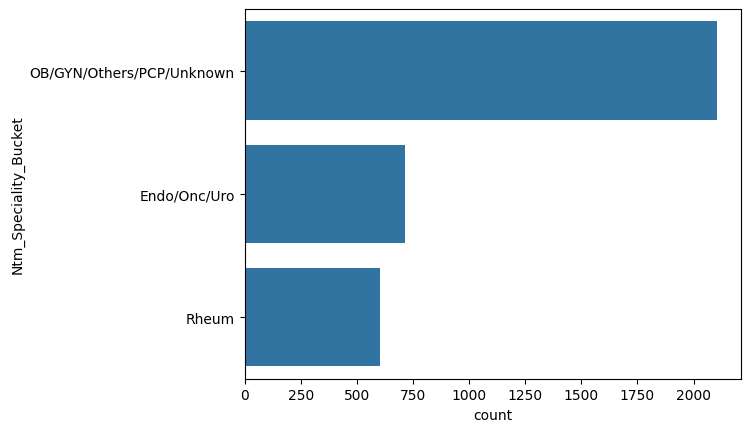

In [186]:
sns.countplot(data=health_data, y='Ntm_Speciality_Bucket')
plt.show()

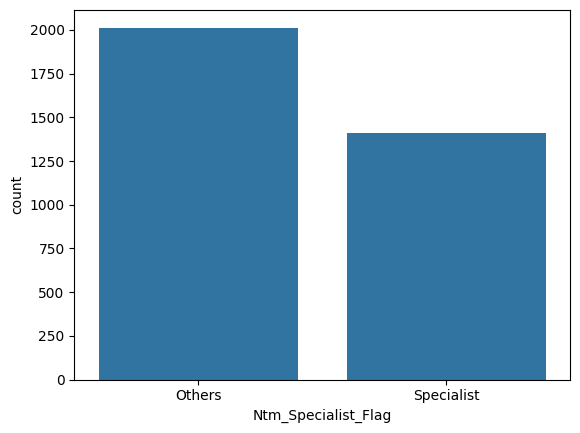

In [187]:
sns.countplot(data=health_data, x='Ntm_Specialist_Flag')
plt.show()

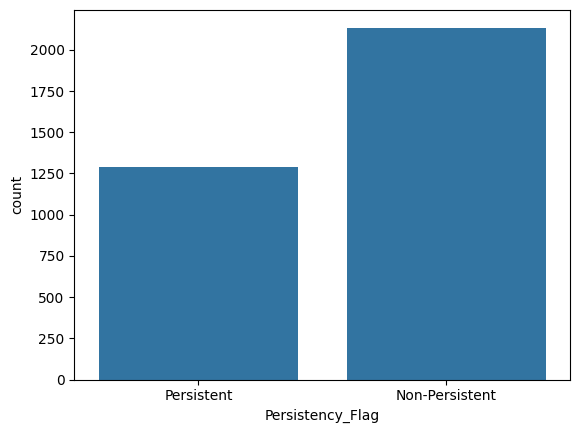

In [188]:
sns.countplot(data=health_data, x='Persistency_Flag')
plt.show()

In [189]:
ethnicity_counts = health_data['Ethnicity'].value_counts()
region_counts = health_data['Region'].value_counts()
age_bucket_counts = health_data['Age_Bucket'].value_counts()
race_counts = health_data['Race'].value_counts()
ntm_speciality_counts = health_data['Ntm_Speciality'].value_counts()
ntm_speciality_flag = health_data['Ntm_Specialist_Flag'].value_counts()
ntm_speciality_bucket = health_data['Ntm_Speciality_Bucket'].value_counts()
change_risk_segment_counts = health_data['Change_Risk_Segment'].value_counts()
change_t_score_counts = health_data['Change_T_Score'].value_counts()

print("Ethnicity Counts:\n", ethnicity_counts)
print("\nRegion Counts:\n", region_counts)
print("\nAge Bucket Counts:\n", age_bucket_counts)
print("\nRace Counts:\n", race_counts)
print("\nNTM Speciality Counts:\n", ntm_speciality_counts)
print("\nNTM Speciality Flag:\n", ntm_speciality_flag)
print("\nNTM Speciality Bucket:\n", ntm_speciality_bucket)
print("\nChange in Risk Segment Counts:\n", change_risk_segment_counts)
print("\nChange in T-Score Counts:\n", change_t_score_counts)

Ethnicity Counts:
 Ethnicity
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: count, dtype: int64

Region Counts:
 Region
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: count, dtype: int64

Age Bucket Counts:
 Age_Bucket
>75      1439
65-75    1086
55-65     733
<55       166
Name: count, dtype: int64

Race Counts:
 Race
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: count, dtype: int64

NTM Speciality Counts:
 Ntm_Speciality
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                          

In [190]:
print("\nNTM Speciality Counts:", ntm_speciality_counts.nunique())


NTM Speciality Counts: 18


In [191]:
# # Identify all categorical columns in the dataset
# categorical_columns = health_data.select_dtypes(include=['object']).columns

# rows = len(categorical_columns) // 2 + len(categorical_columns) % 2
# plt.figure(figsize=(20, 5 * rows))

# for i, column in enumerate(categorical_columns):
#     plt.subplot(rows, 2, i + 1)
#     sns.countplot(y=column, data=health_data, palette='viridis')
#     plt.title(f'Distribution of {column}')
#     plt.tight_layout()

# plt.show()



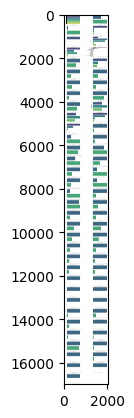

In [192]:
image_path = 'output.png'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

### Detection of Missing Values

In [193]:
# Check for missing data in each column
missing_data = health_data.isnull().sum()

# Display the columns with missing data and their counts
missing_data[missing_data > 0]

Series([], dtype: int64)

## 1.3. Data Cleaning and Preprocessing


In [194]:
# Calculate the threshold for 5% of the total observations
threshold = len(health_data) * 0.05
health_data_preprocessed = health_data

In [195]:

# Find out why Dexa_Freq_During_Rx observations are above the limit - is there any confounding variable that 
# could be constant for these outlier values?

# outliers.Age_Bucket.value_counts()
# health_data.Age_Bucket.value_counts()

# outliers.Ntm_Speciality.value_counts()
# In comparison to the rest of the data is there a difference in practitioner type ?
# when the Dexa_Freq_During_Rx is higher than the upper limit?


*Categorical Data Preprocessing - Ntm_Speciality Segmentation*

In [196]:
# Identify specialties representing less than 5% of the total
below_threshold = health_data_preprocessed.Ntm_Speciality.value_counts()[health_data_preprocessed.Ntm_Speciality.value_counts() < threshold]
below_threshold.index

Index(['OBSTETRICS AND GYNECOLOGY', 'UROLOGY', 'ORTHOPEDIC SURGERY',
       'CARDIOLOGY', 'PATHOLOGY', 'HEMATOLOGY & ONCOLOGY', 'OTOLARYNGOLOGY',
       'PEDIATRICS', 'PHYSICAL MEDICINE AND REHABILITATION',
       'PULMONARY MEDICINE', 'SURGERY AND SURGICAL SPECIALTIES',
       'PSYCHIATRY AND NEUROLOGY', 'NEPHROLOGY', 'ORTHOPEDICS',
       'PLASTIC SURGERY', 'VASCULAR SURGERY',
       'HOSPICE AND PALLIATIVE MEDICINE', 'GERIATRIC MEDICINE',
       'GASTROENTEROLOGY', 'TRANSPLANT SURGERY', 'CLINICAL NURSE SPECIALIST',
       'OCCUPATIONAL MEDICINE', 'HOSPITAL MEDICINE', 'OPHTHALMOLOGY',
       'PODIATRY', 'EMERGENCY MEDICINE', 'RADIOLOGY',
       'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY',
       'NEUROLOGY', 'PAIN MEDICINE', 'NUCLEAR MEDICINE'],
      dtype='object', name='Ntm_Speciality')

In [197]:
# Replace these specialties with 'Other'
health_data_preprocessed['Ntm_Speciality_Restructured'] = health_data_preprocessed['Ntm_Speciality'].apply(lambda x: 'Other' if x in below_threshold.index else x)
health_data_preprocessed['Ntm_Speciality_Restructured'].value_counts()


Ntm_Speciality_Restructured
GENERAL PRACTITIONER    1535
RHEUMATOLOGY             604
ENDOCRINOLOGY            458
Unknown                  310
Other                    292
ONCOLOGY                 225
Name: count, dtype: int64

*Categorical Data Preprocessing - Removal of Unknown/Other values under 5% of total values*

In [198]:
# Identify all categorical columns in the dataset
categorical_columns = health_data_preprocessed.select_dtypes(include=['object']).columns

In [199]:
# Assuming health_data is your DataFrame
for column in categorical_columns:
    # Check if the column contains 'Unknown', 'unknown', 'Other', or 'other'
    contains_unknown = health_data_preprocessed[column].str.contains('Unknown|unknown|Other|other', na=False)
    
    # Count the number of 'Unknown' values
    unknown_count = contains_unknown.sum()
    
    # If the count of 'Unknown' values is less than the threshold AND not equal to 0
    if (unknown_count < threshold) & (unknown_count != 0):
        print('Below Threshold:')
        print(f"Column: {column}, Unknown Count: {unknown_count}")
        # Using 'contains_unknown' to filter out rows where the current column contains 'Unknown', etc.
        # The '~' operator inverts the boolean series to keep rows NOT containing 'Unknown', etc.
        health_data_preprocessed = health_data_preprocessed[~contains_unknown]
    elif (unknown_count > threshold):
        print('Above Threshold:')
        print(f"Column: {column}, Unknown Count: {unknown_count}")
        


Below Threshold:
Column: Race, Unknown Count: 97
Below Threshold:
Column: Ethnicity, Unknown Count: 68
Below Threshold:
Column: Region, Unknown Count: 57
Above Threshold:
Column: Ntm_Speciality, Unknown Count: 290
Above Threshold:
Column: Ntm_Specialist_Flag, Unknown Count: 1890
Above Threshold:
Column: Ntm_Speciality_Bucket, Unknown Count: 1973
Above Threshold:
Column: Risk_Segment_During_Rx, Unknown Count: 1393
Above Threshold:
Column: Tscore_Bucket_During_Rx, Unknown Count: 1393
Above Threshold:
Column: Change_T_Score, Unknown Count: 1393
Above Threshold:
Column: Change_Risk_Segment, Unknown Count: 2079
Above Threshold:
Column: Ntm_Speciality_Restructured, Unknown Count: 563


In [200]:
print(health_data.shape)
print(health_data_preprocessed.shape)

(3424, 70)
(3202, 70)


In [201]:
health_data_preprocessed.drop('Ntm_Speciality_Bucket', inplace=True, axis=1)

In [202]:
health_data_preprocessed.to_csv('health_data_preprocessed.csv', index=False)

# 2. Exploritory Data Analysis
- Looking at Data Types Numerical / Categorical - Comparing with the Target Variable

<AxesSubplot: xlabel='Count_Of_Risks', ylabel='Dexa_Freq_During_Rx'>

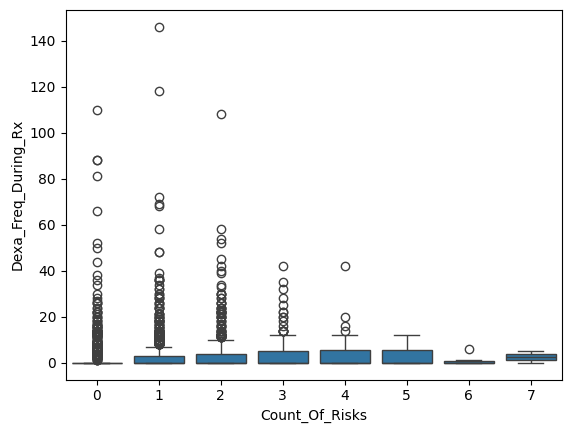

In [203]:
sns.boxplot(data=health_data, x='Count_Of_Risks', y='Dexa_Freq_During_Rx')

<AxesSubplot: xlabel='Count_Of_Risks', ylabel='Dexa_Freq_During_Rx'>

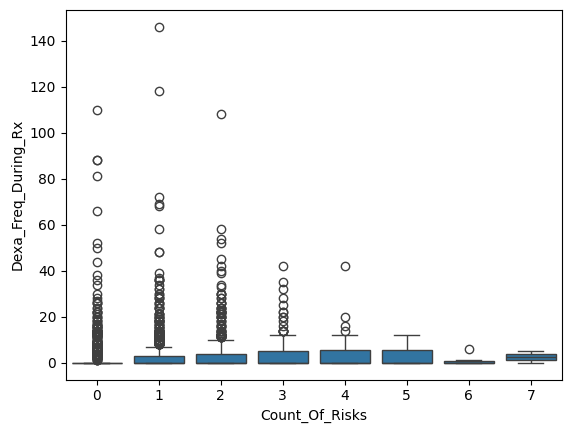

In [204]:
sns.boxplot(data=health_data, x='Count_Of_Risks', y='Dexa_Freq_During_Rx')

<AxesSubplot: xlabel='Count_Of_Risks', ylabel='Count'>

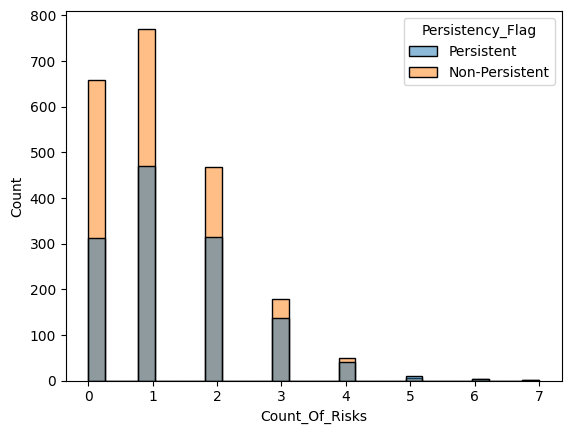

In [205]:
sns.histplot(data=health_data, x='Count_Of_Risks', hue='Persistency_Flag')

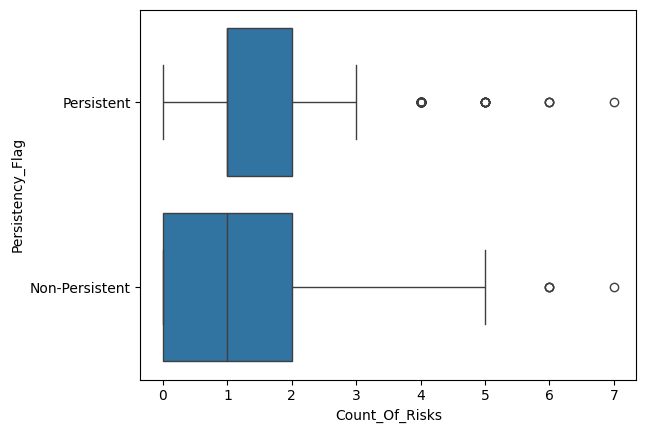

In [206]:
# sns.boxplot(data=health_data, x='Count_Of_Risks', y='Dexa_Freq_During_Rx')
sns.boxplot(data=health_data, x='Count_Of_Risks', y='Persistency_Flag')
plt.show()

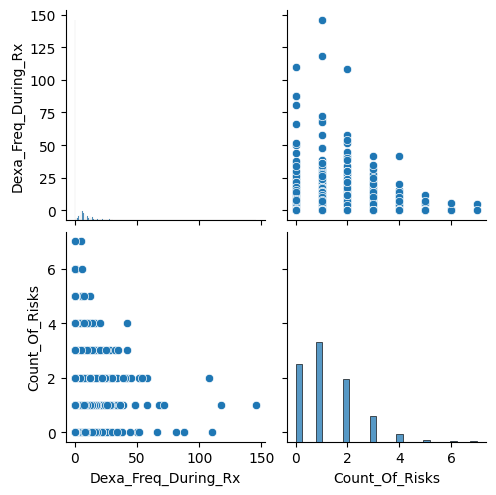

In [207]:
sns.pairplot(data=health_data)

# 3. Model Building

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import joblib

## Transforming Data - Imputation/One-Hot-Encoding

In [209]:
# Identifying categorical columns that need to be encoded
categorical_columns = health_data_preprocessed.select_dtypes(include=['object']).columns.drop('Persistency_Flag')
numerical_columns = health_data_preprocessed.select_dtypes(exclude=['object']).columns

# Target variable encoding
health_data_preprocessed['Persistency_Flag'] = health_data_preprocessed['Persistency_Flag'].map({'Persistent': 1, 'Non-Persistent': 0})

# Define the transformer for categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a ColumnTransformer
transform = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', 'passthrough', numerical_columns)
    ])

# Splitting the data into features and target variable
X = health_data_preprocessed.drop('Persistency_Flag', axis=1)
y = health_data_preprocessed['Persistency_Flag']

# Preprocess the data
transform.fit(X)  # Fit the preprocessor on the entire dataset (if necessary, for example, to fit scalers or imputers)
X_transformed = transform.transform(X)  # Transform the dataset

# Split the preprocessed/transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42)



In [ ]:
# Save the best estimator
joblib.dump(transform, 'transformer.pkl')

## Logistic Regression

In [210]:
# Parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet']
}

# Logistic Regression Pipeline
logistic_regression = LogisticRegression(max_iter=10000, random_state=42, solver='saga')  # solver adjusted for use of all penalties


# Grid Search for Logistic Regression
grid_search_lr = GridSearchCV(logistic_regression, param_grid=param_grid_lr, cv=5, scoring='accuracy', return_train_score=True)
grid_search_lr.fit(X_train, y_train)


/Users/Yusuf/PycharmProjects/Venv1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Yusuf/PycharmProjects/Venv1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Yusuf/PycharmProjects/Venv1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1101, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWa

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42,
                                          solver='saga'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True, scoring='accuracy')

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Training Accuracy: 0.8675320850109809
Best Validation Accuracy: 0.8078833150584795
Best Test Accuracy (uses best Params): 0.8346333853354134

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       390
           1       0.82      0.74      0.78       251

    accuracy                           0.83       641
   macro avg       0.83      0.82      0.82       641
weighted avg       0.83      0.83      0.83       641

Logistic Regression Accuracy: 0.8346333853354134
Logistic Regression Precision: 0.8193832599118943
Logistic Regression Recall: 0.7410358565737052
Logistic Regression F1 Score: 0.7782426778242679


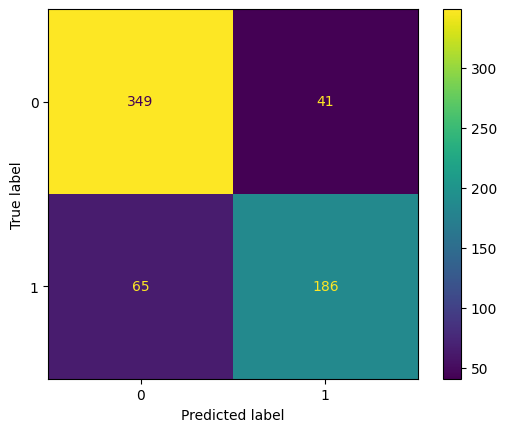

In [211]:
print('Best Hyperparameters:', grid_search_lr.best_params_)
print('Best Training Accuracy:', grid_search_lr.cv_results_['mean_train_score'][grid_search_lr.best_index_])
print('Best Validation Accuracy:', grid_search_lr.best_score_)
print('Best Test Accuracy (uses best Params):', grid_search_lr.score(X_test, y_test))

y_pred_lr = grid_search_lr.predict(X_test) # Automatically uses the best parameters

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Print classification report and overall statistics
print('\nClassification Report:\n', classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))

In [212]:
# Save the best estimator
joblib.dump(grid_search_lr.best_estimator_, 'logistic_regression_model.pkl')


['grid_search_lr.pkl']

## Random Forest

Model Build

In [213]:

# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Random Forest Pipeline
random_forest = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(random_forest, param_grid=param_grid_rf, cv=5, scoring='accuracy', return_train_score=True)

grid_search_rf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='accuracy')

Model Evaluation

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Training Accuracy: 0.9555833257076622
Best Validation Accuracy: 0.8090536671539962
Best Test Accuracy (Auto uses best Params): 0.8299531981279251

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       390
           1       0.85      0.68      0.76       251

    accuracy                           0.83       641
   macro avg       0.84      0.80      0.81       641
weighted avg       0.83      0.83      0.83       641

Random Forest Accuracy: 0.8299531981279251
Random Forest Precision: 0.855
Random Forest Recall: 0.6812749003984063
Random Forest F1 Score: 0.7583148558758315


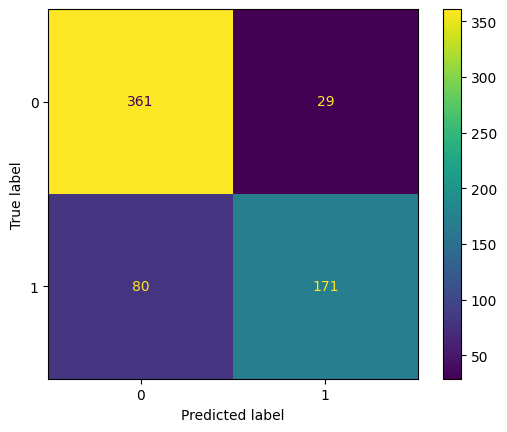

In [214]:
print('Best Hyperparameters:', grid_search_rf.best_params_)
print('Best Training Accuracy:', grid_search_rf.cv_results_['mean_train_score'][grid_search_rf.best_index_])
print('Best Validation Accuracy:', grid_search_rf.best_score_)
print('Best Test Accuracy (Auto uses best Params):', grid_search_rf.score(X_test, y_test))

y_pred_rf = grid_search_rf.predict(X_test) # Automatically uses the best parameters

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Print classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))

Model Feature Importance 

In [215]:
# # Accessing the best estimator from GridSearchCV
# best_rf_classifier = grid_search_rf.best_estimator_

# # Assuming 'preprocessor' is your ColumnTransformer and it's part of the 'best_rf_pipeline'
# feature_names_transformed = transform.get_feature_names_out()

# # Finally, get the feature importances
# feature_importances_rf = best_rf_classifier.feature_importances_

# # Create a DataFrame mapping features to their importances
# feature_importances_df = pd.DataFrame({
#     'Feature': feature_names_transformed,
#     'Importance': feature_importances_rf
# }).sort_values('Importance', ascending=False)

# feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# top_100_important = feature_importances_df.head(100)

# selected_features = top_100_important['Feature'].tolist()
# selected_features

Retraining with High Importance Values

## XGBoost

In [216]:

# Parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10]
}

# XGBoost Pipeline
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid Search for XGBoost
grid_search_xgb = GridSearchCV(xgboost, param_grid=param_grid_xgb, cv=5, scoring='accuracy', return_train_score=True)
grid_search_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200]},
             return_train_score=True, scoring='accuracy')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best Training Accuracy: 0.9579265037823328
Best Validation Accuracy: 0.813738882797271
Best Test Accuracy (uses best Params): 0.8252730109204368

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       390
           1       0.82      0.71      0.76       251

    accuracy                           0.83       641
   macro avg       0.82      0.81      0.81       641
weighted avg       0.82      0.83      0.82       641

XGBoost Accuracy: 0.8252730109204368
XGBoost Precision: 0.817351598173516
XGBoost Recall: 0.7131474103585658
XGBoost F1 Score: 0.7617021276595745


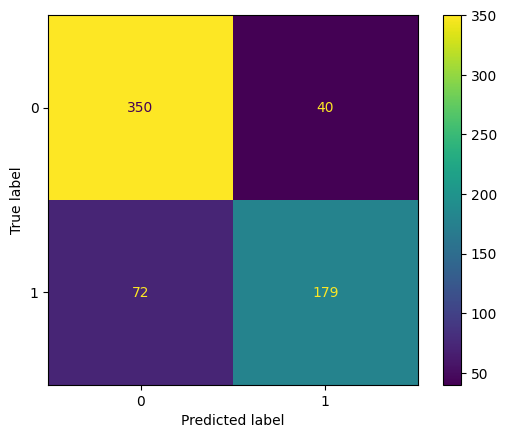

In [217]:
print('Best Hyperparameters:', grid_search_xgb.best_params_)
print('Best Training Accuracy:', grid_search_xgb.cv_results_['mean_train_score'][grid_search_xgb.best_index_])
print('Best Validation Accuracy:', grid_search_xgb.best_score_)
print('Best Test Accuracy (uses best Params):', grid_search_xgb.score(X_test, y_test))

y_pred_xgb = grid_search_xgb.predict(X_test) # Automatically uses the best parameters

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Print classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Precision:", precision_score(y_test, y_pred_xgb))
print("XGBoost Recall:", recall_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))

Saving Model/Preprocesser

In [218]:
import joblib

# Save the preprocessor to a file
joblib.dump(transform, 'transformer.pkl')

['transformer.pkl']